In [3]:
# toogle view
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Meta

## Directories

In [1]:
#directories
import os
try:
    parentdir
except NameError:
    parentdir=os.getcwd()
else:
    parentdir = parentdir
# homedir=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S101d14Feb17_60.5_635_A2_CuAzu655';#data directory
print('The working directory is parentdir: %s' %parentdir)
# print('The data directory is homedir: %s' %homedir)

The working directory is parentdir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/Azurin_SM_repo/Manuscript/Figure_AT647N_SI


In [2]:
#list of folders and their directories CuAZUATTO647N % ZnAzuATTO647N
Analysis_dir = '/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/Azurin_SM_repo/Analysis'
data_dir = '/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data'#GIVE the PATH of this FOLDER.

ZnAzu_dir = os.path.join(data_dir, 'AzurinATTO647N/20180227_ZnAzu647N_sm')

In [3]:
# Checking or creating temp_dir
temp_dir = 'temp'
temp_dir = os.path.join(temp_dir)
if os.path.isdir(temp_dir):
    print('temp_dir exists')
else:
    os.makedirs(temp_dir)
    print('temp_dir created')

temp_dir exists


## Modules and run .py files

In [8]:
os.chdir(Analysis_dir)

%run simulation.py
%run Analysis.py
%run changepoint_process.py
%run longtrace_stat.py
os.chdir(parentdir)

%matplotlib inline

## Figure Parameters

In [6]:
from pylab import *
matplotlib.rcParams['svg.fonttype'] = 'none'
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.size"] = "10"
rc('axes', linewidth=1)
# plt.savefig('/home/biswajit/Downloads/test.svg', format='svg', transparent=True)

# Time trace vs Potential: ZnAzurin647N

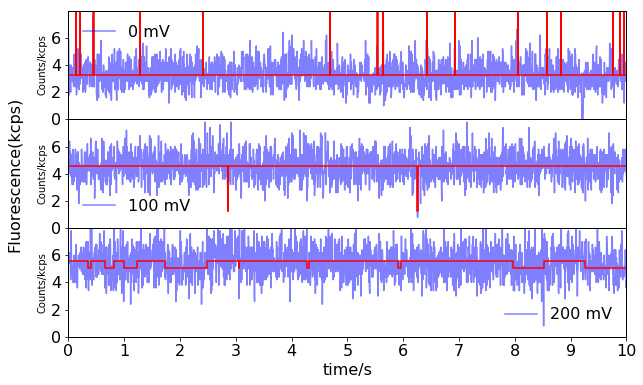

In [7]:
fig = timetraceplot_potentials(foldername=ZnAzu_dir, input_potential=[0, 100, 200],
                             pointnumbers=[1], x_lim_min=0, x_lim_max=10,
                             y_lim_min=0, y_lim_max=8, bintime=5e-3,
                             show_changepoint=False, figsize=(10, 6))
plt.savefig(os.path.join(temp_dir, 'timetrace_vs_V_az647N.svg'), format='svg', dpi=300, transparent=True)

# Simulated long trace

## By parts

In [36]:
simulatedhdf5 = os.path.join(Analysis_dir, 'data_simulated/20180423_1618_ton0.1toff0.5timelen3600bg150sig1500.hdf5');
h5 = h5py.File(simulatedhdf5);
timestamps = h5['onexp_offexp']['timestamps'][...];
nanotimes = h5['onexp_offexp']['nanotimes'][...];
h5.close()

['0', '200', '400', '600', '800', '1000', '1200', '1400', '1600', '1800', '2000', '2200', '2400', '2600', '2800']


/home/biswajit/anaconda3/envs/pyphd/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/biswajit/anaconda3/envs/pyphd/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


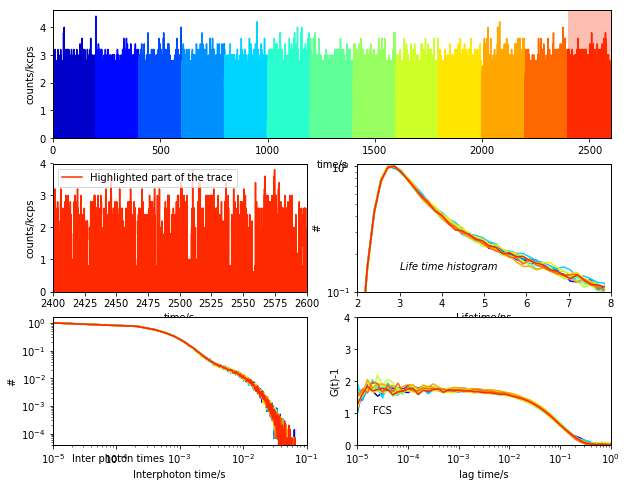

In [37]:
save_folder = temp_dir
out = longtrace_byparts_color(timestamps, nanotimes, save_folder,
                              window=2e2, period=2e2,
                              tmin = 0, tmax=3000,
                              by_photon=False, plotting=True)
[df_ts, df_lt, df_fcs, df_ip] = out
#save figire
plt.savefig(os.path.join(temp_dir, 'simulated_longtrace_byparts.svg'), format='svg', dpi=300, transparent=True)